In [ ]:
import numpy as np

In [7]:
import sys
print(sys.executable)
import numpy
import h5py


/home/johnh/miniconda3/envs/nyuv2_env/bin/python


In [6]:
import numpy, torch, h5py, cv2
import albumentations
print("All imports successful!")
print(torch.__version__)


All imports successful!
2.9.1+cu130


In [ ]:
import h5py
from pathlib import Path


DATA_PATH = Path("/mnt/c/Users/johnh/Desktop/simantik/METAPTYXIAKO assignments/MachineLearning/data")
nyu = DATA_PATH / "nyu_depth_v2_labeled.mat"

f = h5py.File(nyu, 'r')
print(list(f.keys()))


['#refs#', '#subsystem#', 'accelData', 'depths', 'images', 'instances', 'labels', 'names', 'namesToIds', 'rawDepthFilenames', 'rawDepths', 'rawRgbFilenames', 'sceneTypes', 'scenes']


AttributeError: 'File' object has no attribute 'shape'

In [15]:
images = f['images']
depths = f['depths']
labels = f['labels']

print("Images shape:", images.shape)
print("Depths shape:", depths.shape)
print("Labels shape:", labels.shape)
print("Number of samples:", images.shape[0])

Images shape: (1449, 3, 640, 480)
Depths shape: (1449, 640, 480)
Labels shape: (1449, 640, 480)
Number of samples: 1449


In [18]:
print("Depth min/max:", depths[0, :, :].min(), depths[0, :, :].max())


Depth min/max: 1.7985953 3.615639


In [23]:
print("Labels unique values:", set(labels[0, :, :].flatten()))

Labels unique values: {np.uint16(0), np.uint16(1), np.uint16(2), np.uint16(3), np.uint16(4), np.uint16(5), np.uint16(6), np.uint16(7), np.uint16(8), np.uint16(9), np.uint16(10), np.uint16(11), np.uint16(12), np.uint16(13), np.uint16(14), np.uint16(15), np.uint16(16), np.uint16(17), np.uint16(18), np.uint16(19), np.uint16(20), np.uint16(21)}


In [27]:
import numpy as np


rgb = np.array(images[0, :, :, :], dtype=np.uint8)
depth = np.array(depths[0, :, :], dtype=np.float32)
label = np.array(labels[0, :, :], dtype=np.int32)

rgb.shape, depth.shape, label.shape

((3, 640, 480), (640, 480), (640, 480))

In [32]:
rgb[0, :5]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(5, 480), dtype=uint8)

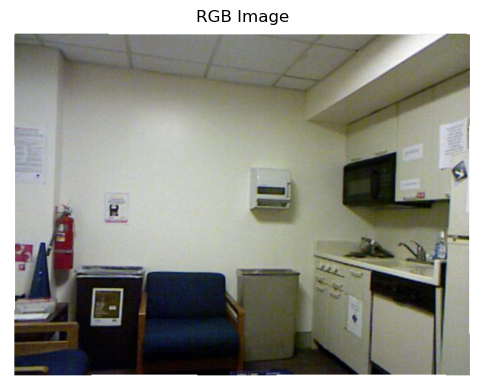

In [34]:
import matplotlib.pyplot as plt

rgb_hwc = np.transpose(rgb, (2, 1, 0))


plt.figure(figsize=(6,6))
plt.imshow(rgb_hwc.astype(np.uint8))
plt.title("RGB Image")
plt.axis('off')
plt.show()


In [39]:
label.shape

(640, 480)

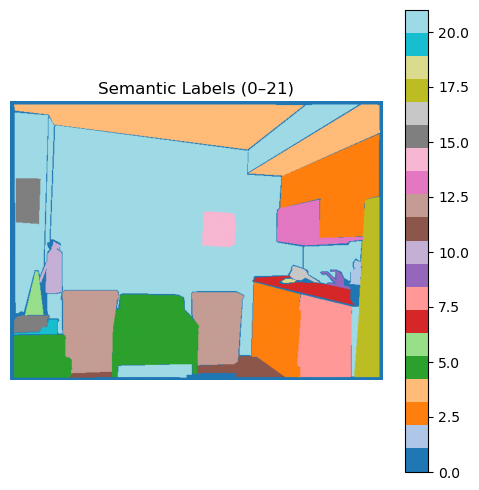

In [ ]:
import matplotlib.pyplot as plt


# label_t = np.transpose(label, (2, 1, 0))

plt.figure(figsize=(6,6))
plt.imshow(label.T, cmap='tab20')  # categorical colormap for 20+ classes
# plt.colorbar()
plt.title("Semantic Labels (0–21)")
plt.axis('off')
plt.show()


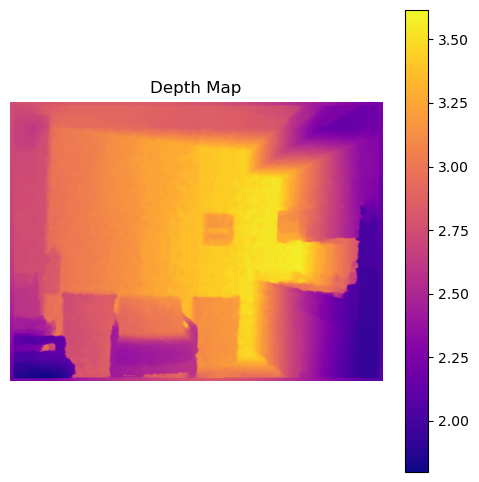

In [44]:
plt.figure(figsize=(6,6))
plt.imshow(depth.T, cmap='plasma')
plt.colorbar()
plt.title("Depth Map")
plt.axis('off')
plt.show()

In [ ]:
# visualize or see the numbers on the image to see how each class is represented
